In [59]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
from scipy import stats
import statsmodels.api as sm



In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
import re
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [62]:
import pandas as pd
import numpy as np

In [63]:
import math

In [64]:
PATH = "chessdata/games/"

In [65]:
df = pd.read_csv(f'{PATH}games.csv')

In [66]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [67]:
df.shape

(20058, 16)

In [68]:
df.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

In [69]:
type(df['winner'][0])

str

In [70]:
type(df['victory_status'][0])

str

In [71]:
type(df['turns'][0])

numpy.int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [73]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20053    False
20054    False
20055    False
20056    False
20057    False
Length: 20058, dtype: bool

In [74]:
df.duplicated().sum()

429

In [75]:
df.drop_duplicates(keep=False, inplace=True)

In [76]:
df.duplicated().sum()

0

In [77]:
df['opening_eco'].value_counts()

A00    980
C00    805
D00    702
B01    699
C41    655
      ... 
D58      1
C32      1
E18      1
D95      1
D19      1
Name: opening_eco, Length: 365, dtype: int64

<AxesSubplot:ylabel='opening_eco'>

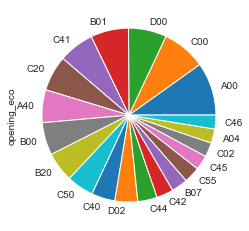

In [78]:
chart = df['opening_eco'].value_counts()
chart.sort_values(ascending=False)
chart = chart[:20]
chart.plot(kind='pie')

In [79]:
print(f"White's minimum ELO in the dataset is {df['white_rating'].min()}")
print(f"White's maximum ELO in the dataset is {df['white_rating'].max()}")
print(f"Black's minimum ELO in the dataset is {df['black_rating'].min()}")
print(f"Black's maximum ELO in the dataset is {df['black_rating'].max()}")

White's minimum ELO in the dataset is 784
White's maximum ELO in the dataset is 2700
Black's minimum ELO in the dataset is 789
Black's maximum ELO in the dataset is 2723


<AxesSubplot:ylabel='white_rating'>

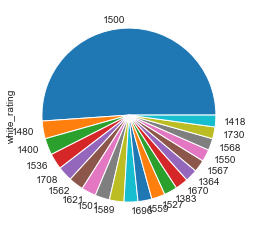

In [80]:
chart = df['white_rating'].value_counts()
chart.sort_values(ascending=False)
chart = chart[:20]
chart.plot(kind='pie')

In [81]:
def roundup(x):
    if x % 100 == 0:
        return x
    elif x % 100 < 50:
        return x - x % 100
    else:
        return x + 100 - x % 100

In [82]:
df['white_rating_clustered'] = df['white_rating'].apply(lambda x: roundup(x))

In [83]:
df['black_rating_clustered'] = df['black_rating'].apply(lambda x: roundup(x))

Text(0, 0.5, 'Count')

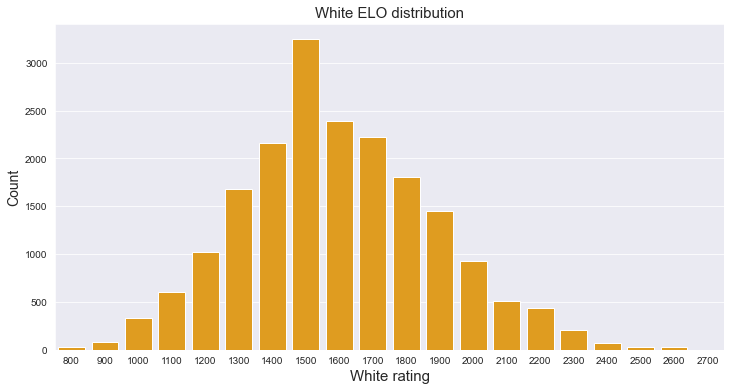

In [84]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
plt.title('White ELO distribution',fontsize=15)
sns.countplot(x='white_rating_clustered',color='orange',data=df)
plt.xlabel('White rating',fontsize=15)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

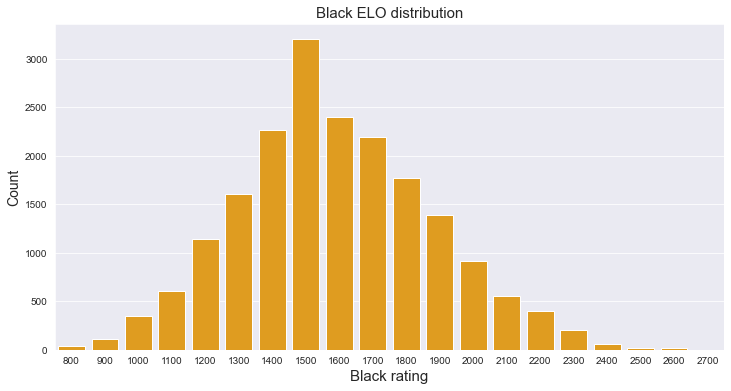

In [85]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
plt.title('Black ELO distribution',fontsize=15)
sns.countplot(x='black_rating_clustered',color='orange',data=df)
plt.xlabel('Black rating',fontsize=15)
plt.ylabel('Count',fontsize=14)

In [86]:
df = df[(df['white_rating'] != 1500) & (df['black_rating'] != 1500)]

AxesSubplot(0.125,0.125;0.775x0.755)


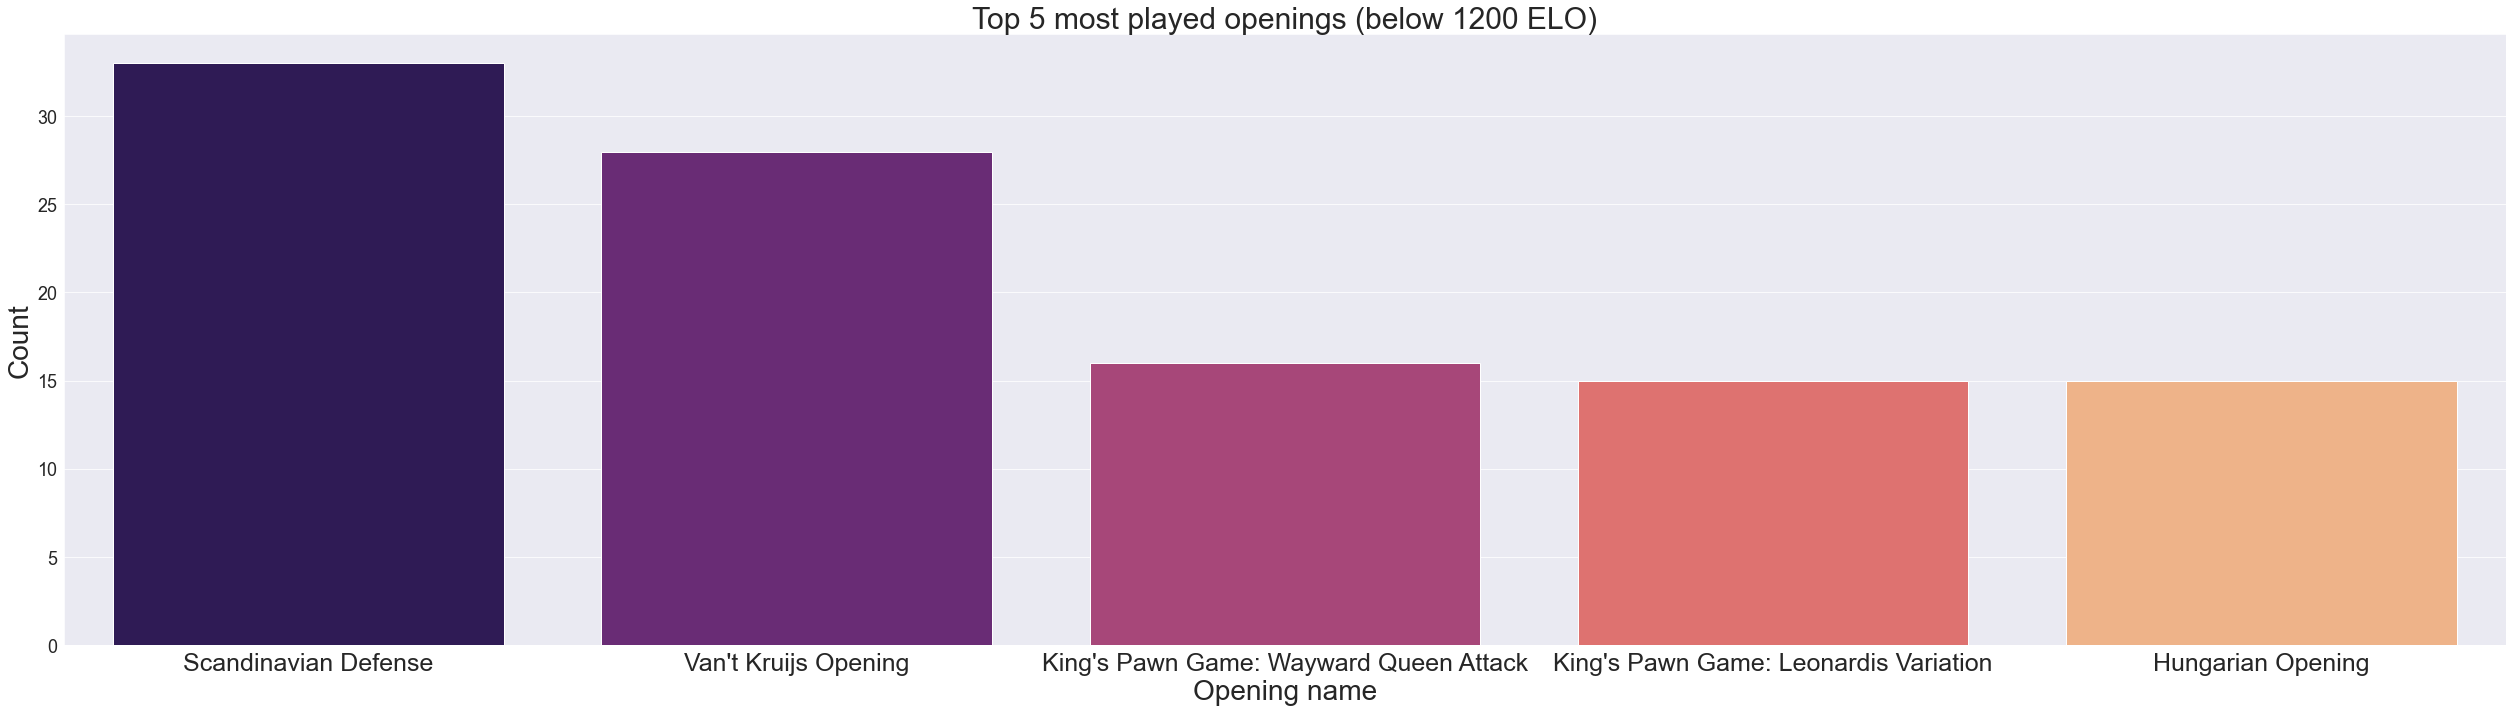

In [87]:
beginner = df[(df['white_rating'] < 1200) & (df['black_rating'] < 1200)]['opening_name'].value_counts().head(5)
plt.figure(figsize=(35,10))
plt.title('Top 5 most played openings (below 1200 ELO)',fontsize=30)
plt.xlabel('Opening name',fontsize=28)
plt.xticks(fontsize=25)
plt.ylabel('Count',fontsize=28)
plt.yticks(fontsize=18)
print(sns.barplot(x=beginner.index,y=beginner.values,palette='magma'))
plt.tight_layout()

AxesSubplot(0.125,0.125;0.775x0.755)


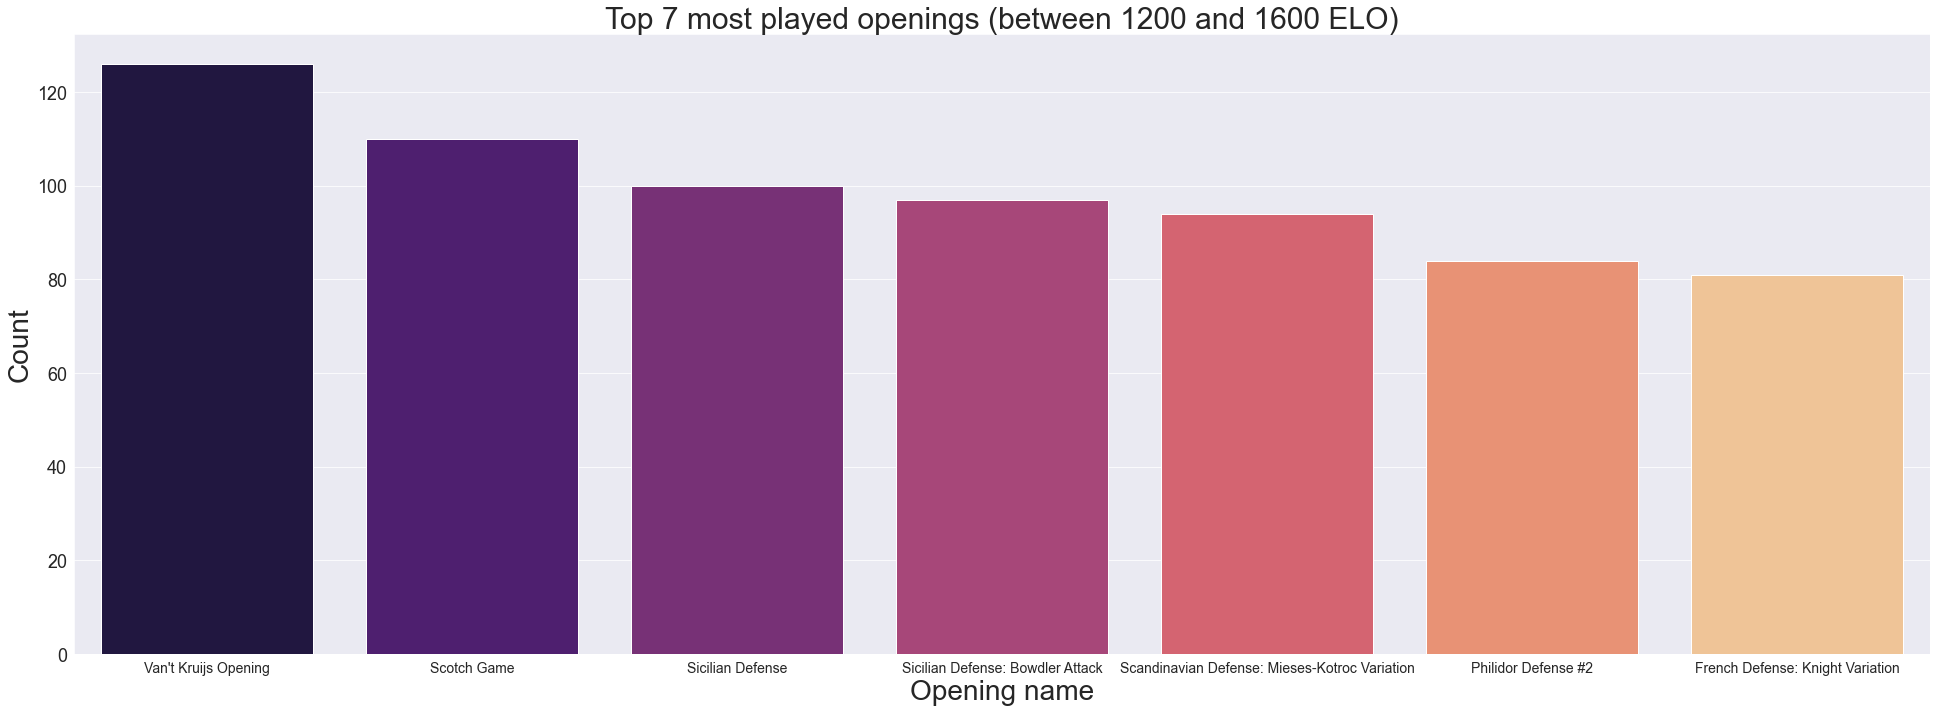

In [88]:
intermediate = df[(df['white_rating'].between(1200,1600)) & (df['black_rating'].between(1200,1600))]['opening_name'].value_counts().head(7)
plt.figure(figsize=(27,10))
plt.title('Top 7 most played openings (between 1200 and 1600 ELO)',fontsize=30)
plt.xlabel('Opening name',fontsize=28)
plt.xticks(fontsize=14)
plt.ylabel('Count',fontsize=28)
plt.yticks(fontsize=18)
print(sns.barplot(x=intermediate.index,y=intermediate.values,palette='magma'))
plt.tight_layout()

AxesSubplot(0.125,0.125;0.775x0.755)


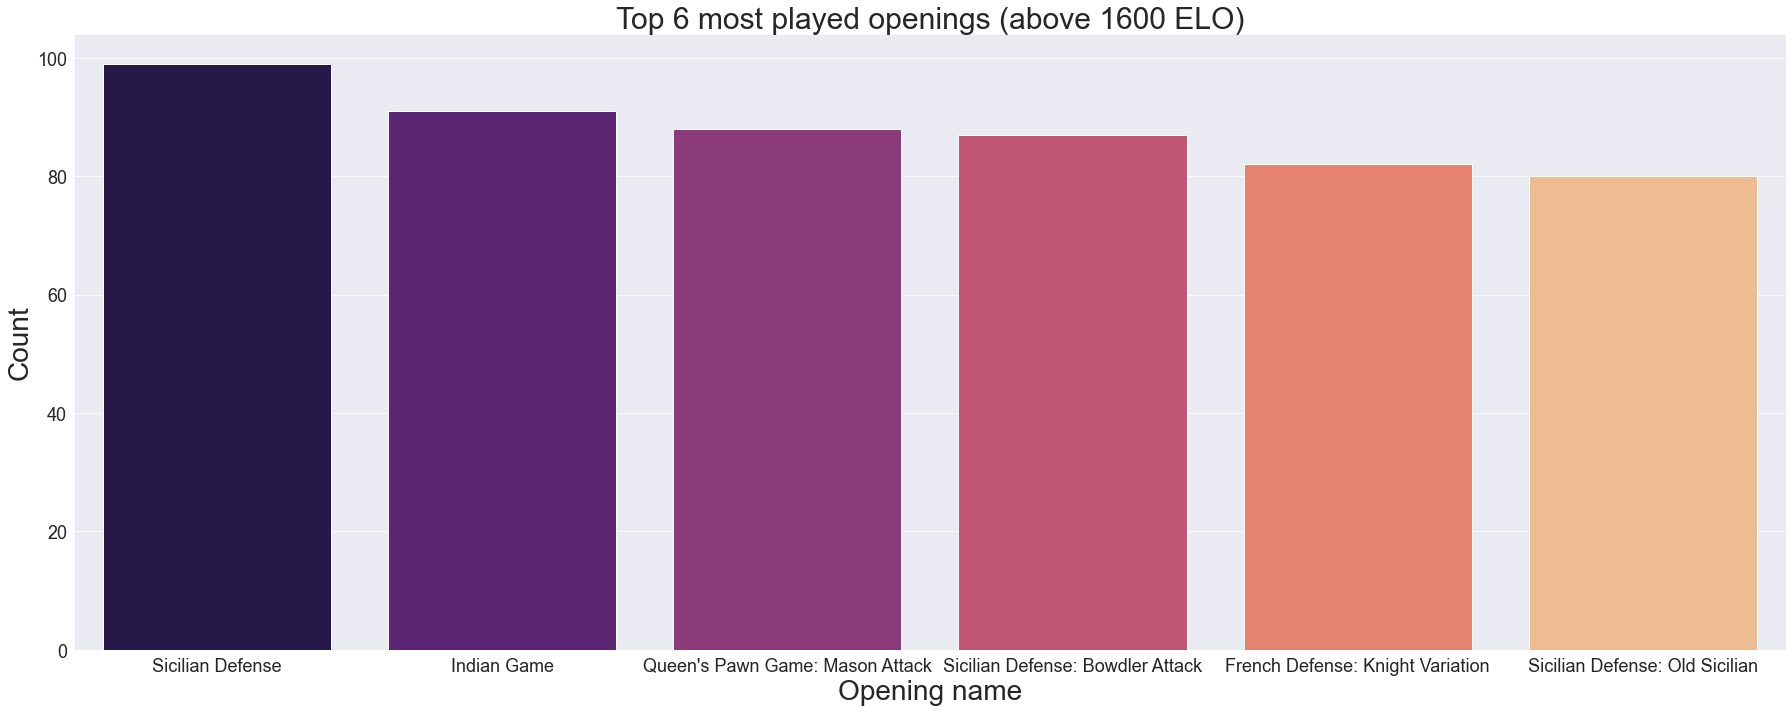

In [89]:
advanced = df[(df['white_rating'] > 1600) & (df['black_rating'] > 1600)]['opening_name'].value_counts().head(6)
plt.figure(figsize=(25,10))
plt.title('Top 6 most played openings (above 1600 ELO)',fontsize=30)
plt.xlabel('Opening name',fontsize=28)
plt.xticks(fontsize=18)
plt.ylabel('Count',fontsize=28)
plt.yticks(fontsize=18)
print(sns.barplot(x=advanced.index,y=advanced.values,palette='magma'))
plt.tight_layout()

AxesSubplot(0.125,0.125;0.775x0.755)


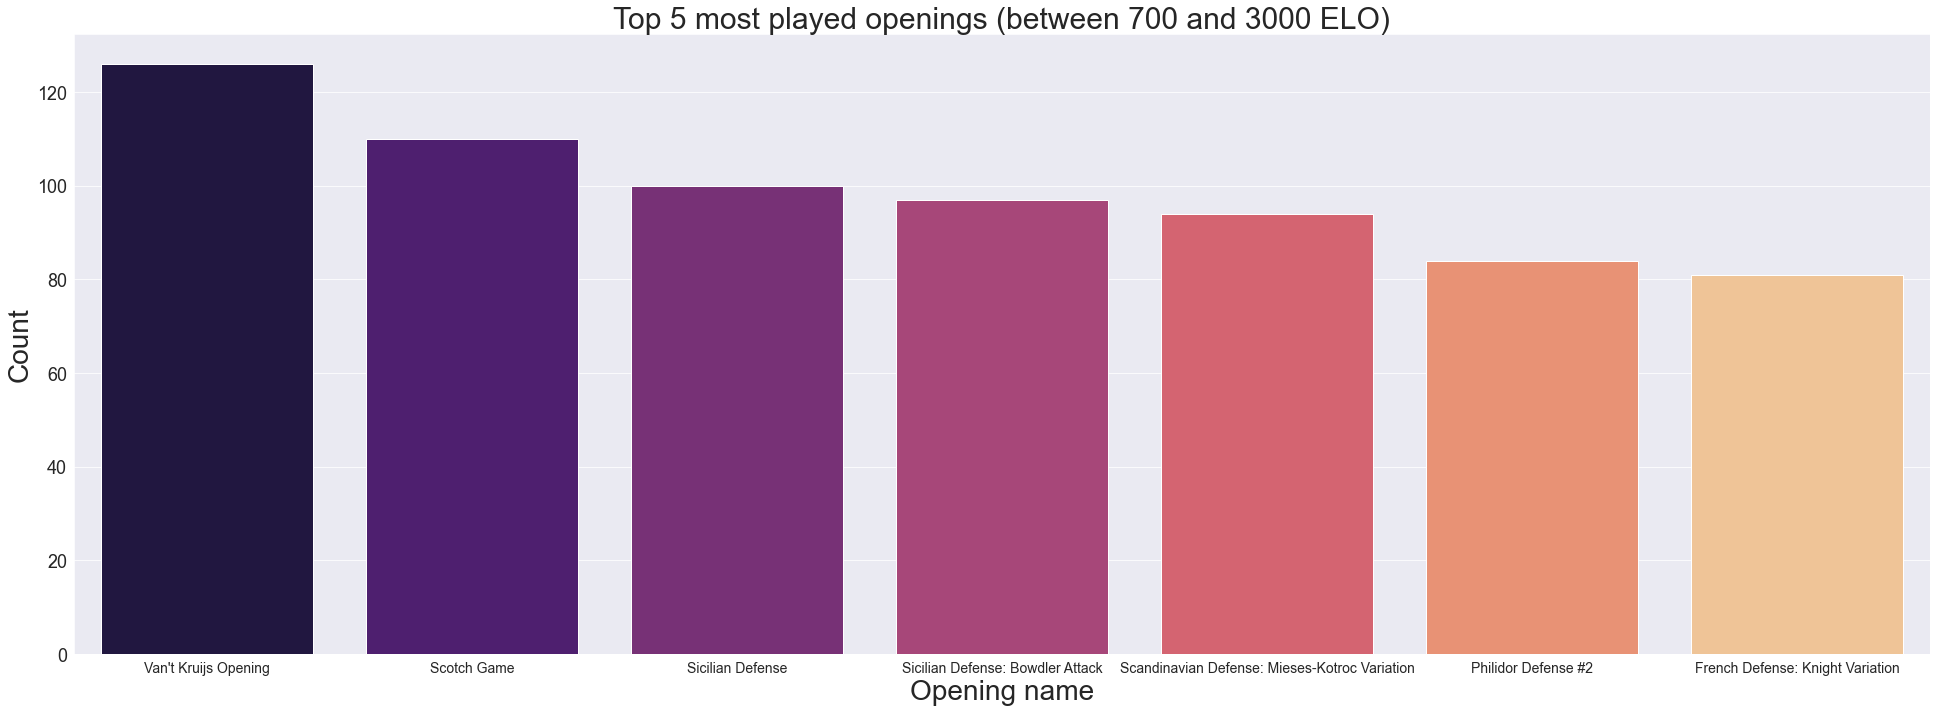

In [90]:
general = df[(df['white_rating'].between(700,3000)) & (df['black_rating'].between(700,3000))]['opening_name'].value_counts().head(5)
plt.figure(figsize=(27,10))
plt.title('Top 5 most played openings (between 700 and 3000 ELO)',fontsize=30)
plt.xlabel('Opening name',fontsize=28)
plt.xticks(fontsize=14)
plt.ylabel('Count',fontsize=28)
plt.yticks(fontsize=18)
print(sns.barplot(x=intermediate.index,y=intermediate.values,palette='magma'))
plt.tight_layout()

Text(0.5, 1.0, 'Rated game')

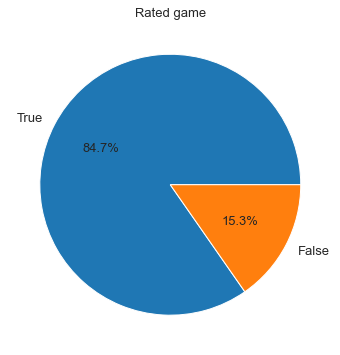

In [91]:


plt.figure(figsize=(6,6))
plt.pie(x = df['rated'].value_counts(),labels = df['rated'].value_counts().index,autopct='%1.1f%%',textprops={'fontsize': 13})
plt.title('Rated game',fontsize=13)



Text(0, 0.5, 'Count')

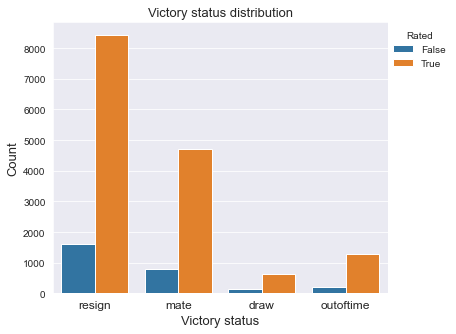

In [92]:
plt.figure(figsize=(6,5))
sns.countplot(x='victory_status',data=df,hue='rated')
plt.legend(bbox_to_anchor=(1.2,1),title='Rated',frameon=False)
plt.title('Victory status distribution',fontsize=13)
plt.xlabel('Victory status',fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel('Count',fontsize=13)

AxesSubplot(0.125,0.125;0.775x0.755)


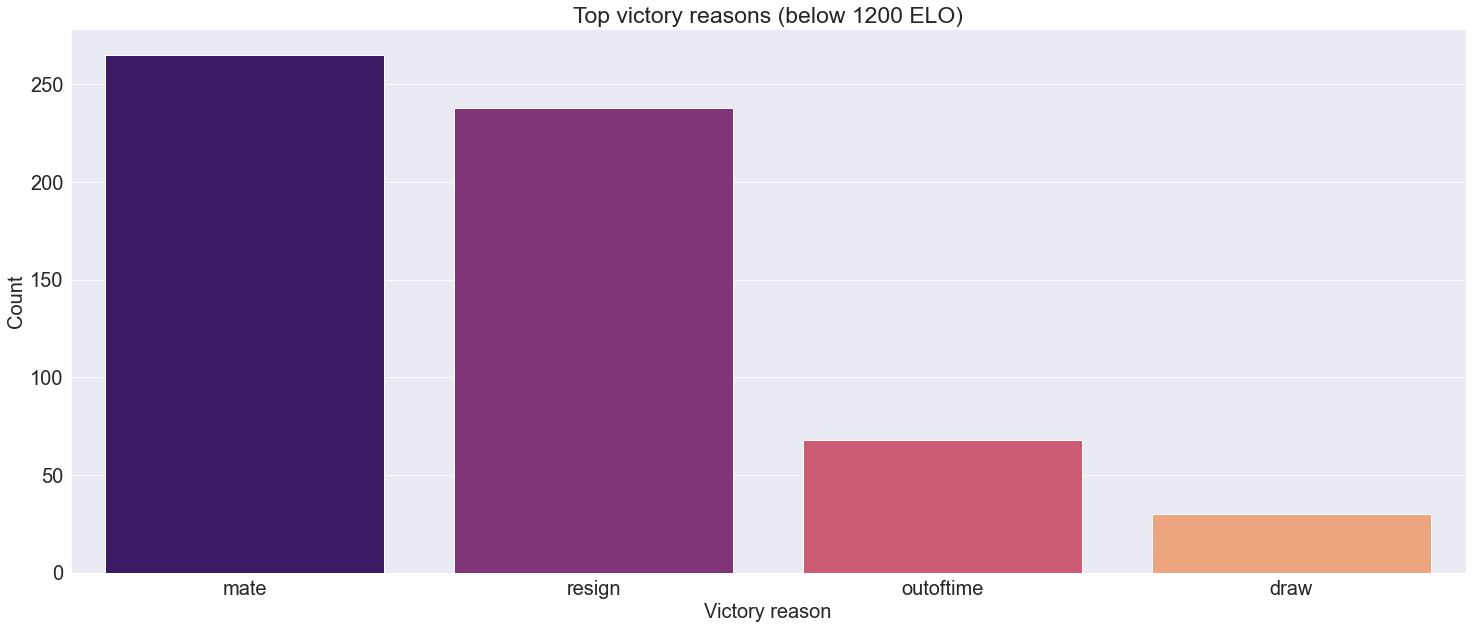

In [93]:
beginnerreason = df[(df['white_rating'] < 1200) & (df['black_rating'] < 1200)]['victory_status'].value_counts()
plt.figure(figsize=(25,10))
plt.title('Top victory reasons (below 1200 ELO)',fontsize=23)
plt.xlabel('Victory reason',fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.yticks(fontsize=20)
print(sns.barplot(x=beginnerreason.index,y=beginnerreason.values,palette='magma'))

AxesSubplot(0.125,0.125;0.775x0.755)


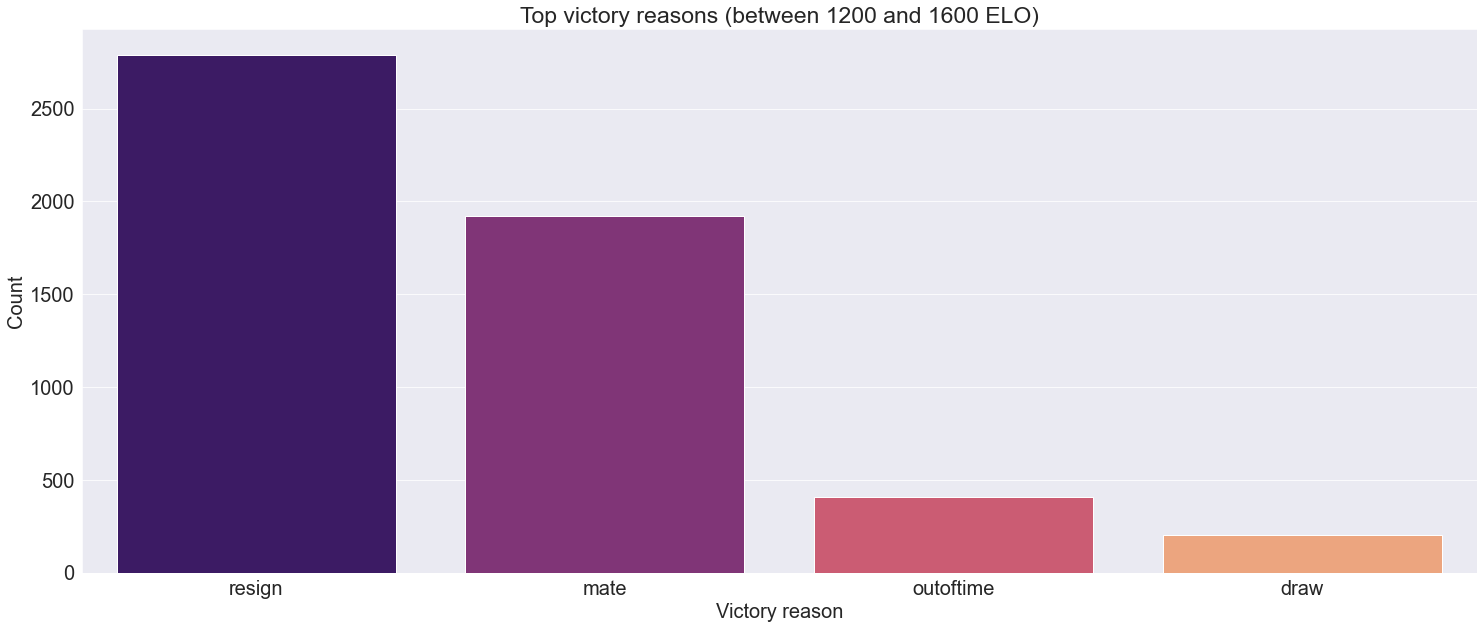

In [94]:
intermediatereason = df[(df['white_rating'].between(1200,1600)) & (df['black_rating'].between(1200,1600))]['victory_status'].value_counts()
plt.figure(figsize=(25,10))
plt.title('Top victory reasons (between 1200 and 1600 ELO)',fontsize=23)
plt.xlabel('Victory reason',fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.yticks(fontsize=20)
print(sns.barplot(x=intermediatereason.index,y=intermediatereason.values,palette='magma'))

AxesSubplot(0.125,0.125;0.775x0.755)


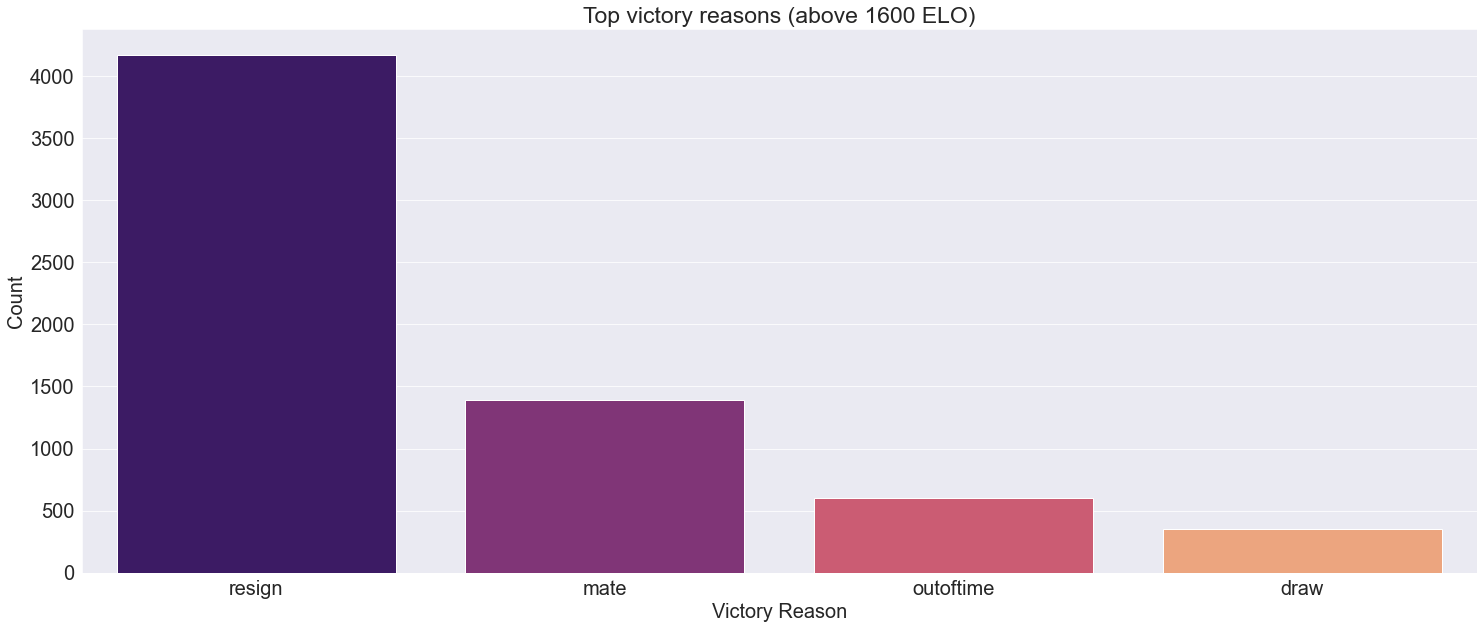

In [95]:
advancedreason = df[(df['white_rating'] > 1600) & (df['black_rating'] > 1600)]['victory_status'].value_counts()
plt.figure(figsize=(25,10))
plt.title('Top victory reasons (above 1600 ELO)',fontsize=23)
plt.xlabel('Victory Reason',fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.yticks(fontsize=20)
print(sns.barplot(x=advancedreason.index,y=advancedreason.values,palette='magma'))

AxesSubplot(0.125,0.125;0.775x0.755)


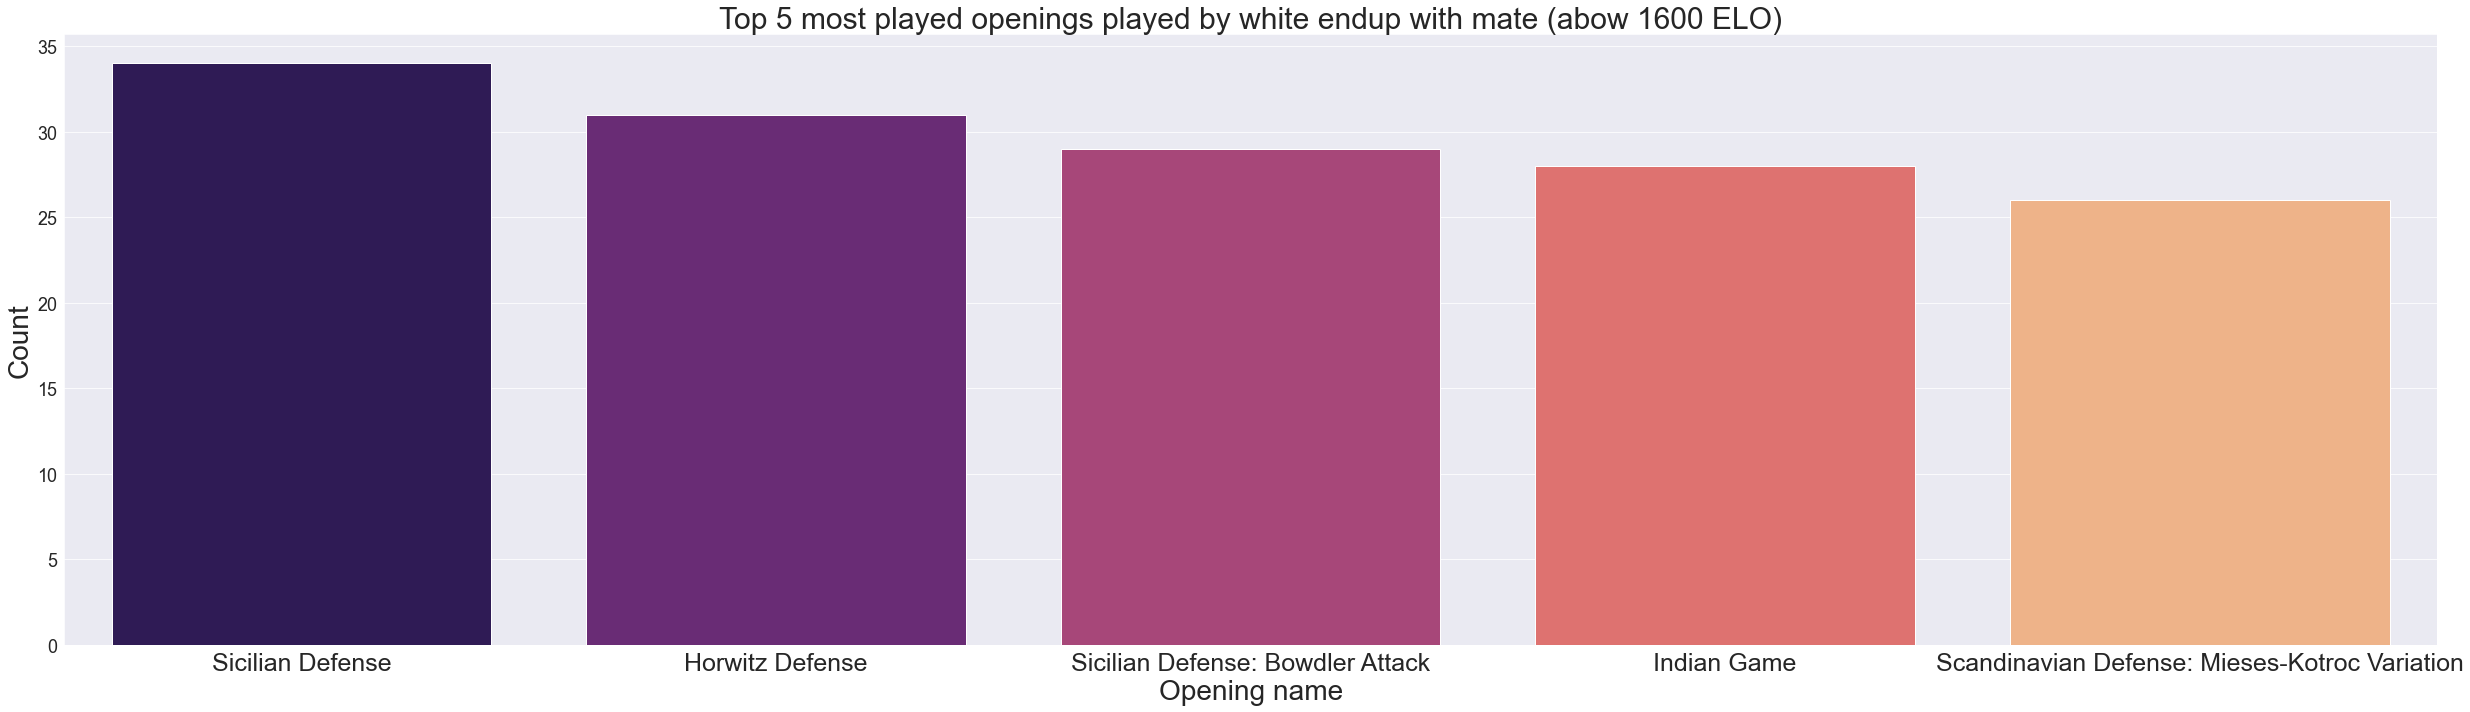

In [111]:
adv_white = df[(df['white_rating'] > 1600) & (df['victory_status'] == 'mate')]['opening_name'].value_counts().head(5)
plt.figure(figsize=(35,10))
plt.title('Top 5 most played openings played by white endup with mate (abow 1600 ELO)',fontsize=30)
plt.xlabel('Opening name',fontsize=28)
plt.xticks(fontsize=25)
plt.ylabel('Count',fontsize=28)
plt.yticks(fontsize=18)
print(sns.barplot(x=beginner.index,y=beginner.values,palette='magma'))
plt.tight_layout()

AxesSubplot(0.125,0.125;0.775x0.755)


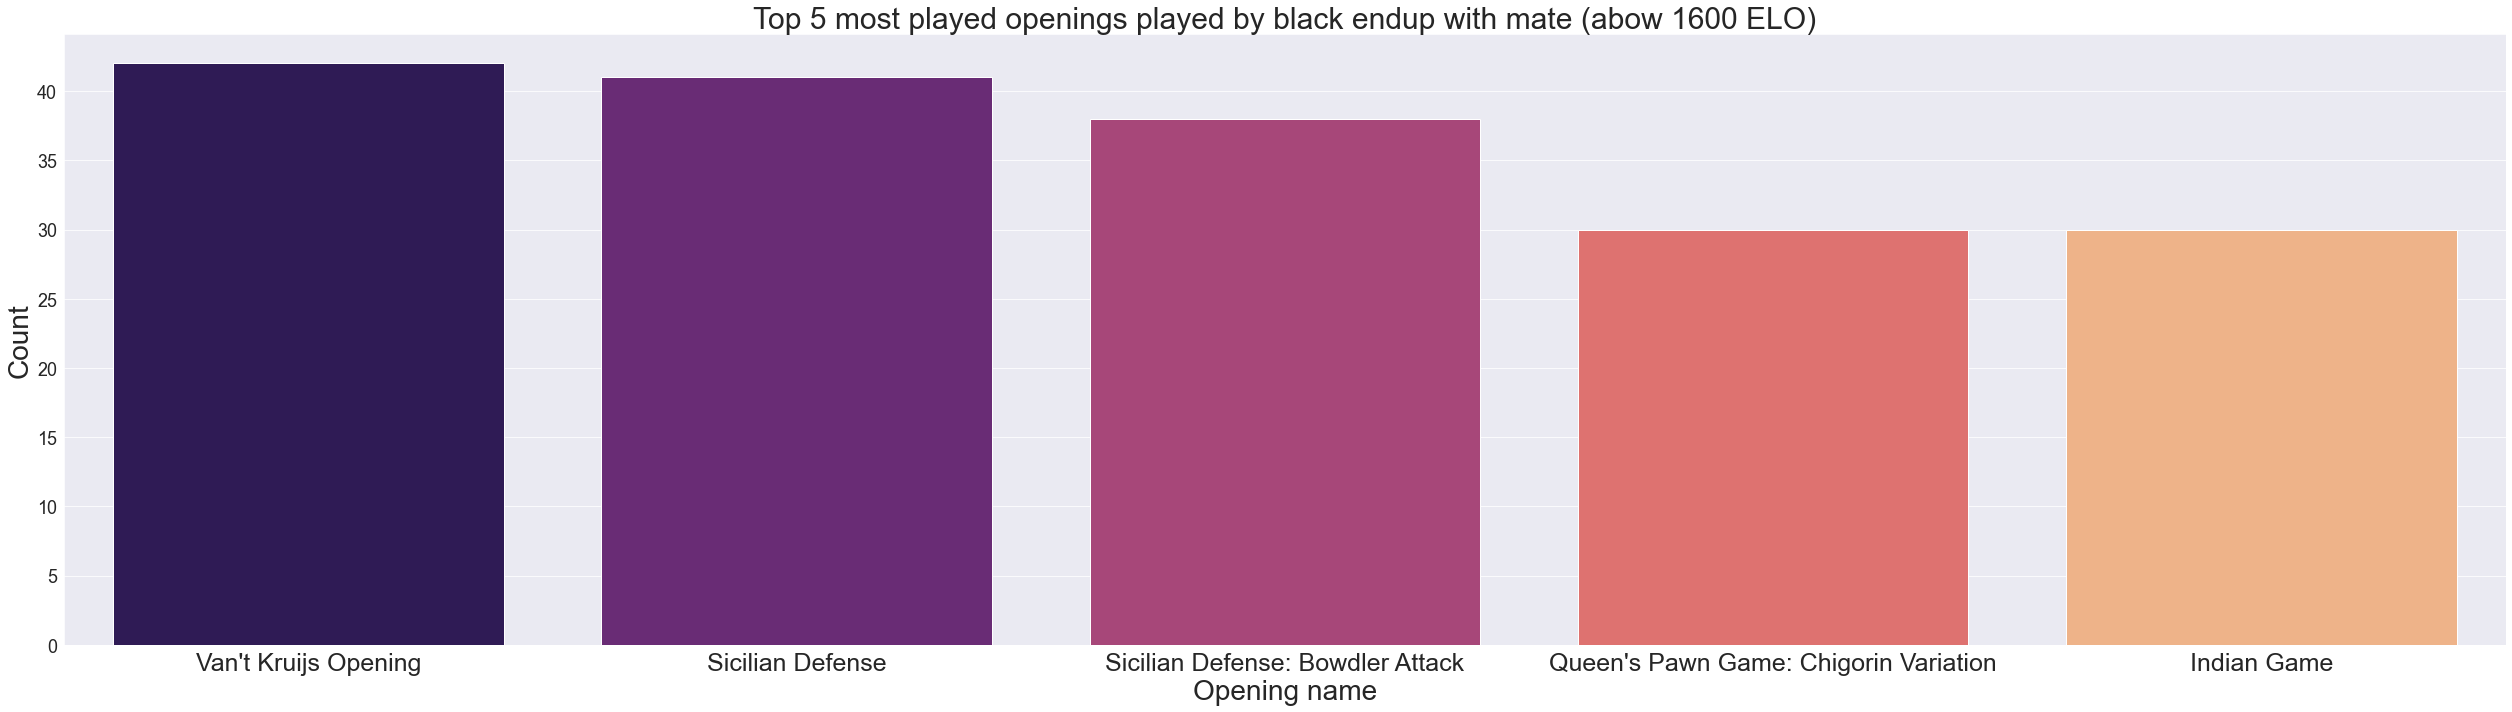

In [118]:
adv_black = df[(df['black_rating'] > 1600) & (df['victory_status'] == 'mate')]['opening_name'].value_counts().head(5)
plt.figure(figsize=(35,10))
plt.title('Top 5 most played openings played by black endup with mate (abow 1600 ELO)',fontsize=30)
plt.xlabel('Opening name',fontsize=28)
plt.xticks(fontsize=25)
plt.ylabel('Count',fontsize=28)
plt.yticks(fontsize=18)
print(sns.barplot(x=beginner.index,y=beginner.values,palette='magma'))
plt.tight_layout()

<AxesSubplot:>

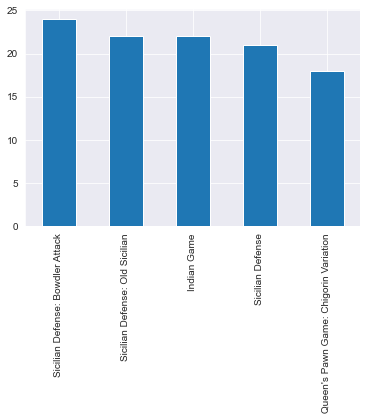

In [190]:
chart = df[(df['black_rating'] > 1600) & (df['white_rating'] > 1600) & (df['victory_status'] == 'mate')]['opening_name'].value_counts()
chart.sort_values(ascending=False)
chart = chart[:5]
chart.plot(kind='bar',figsize=(6,4))